## FLC Simulation for Line Follower Robot

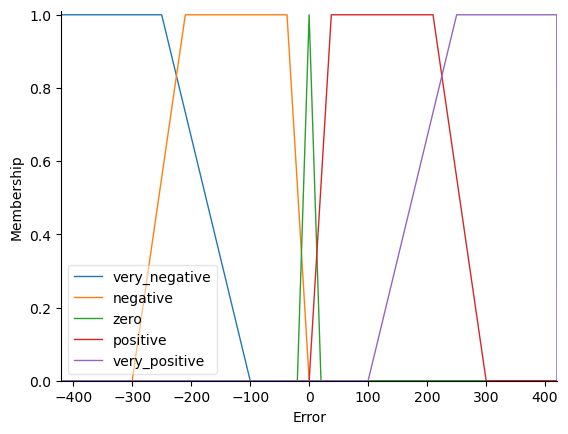

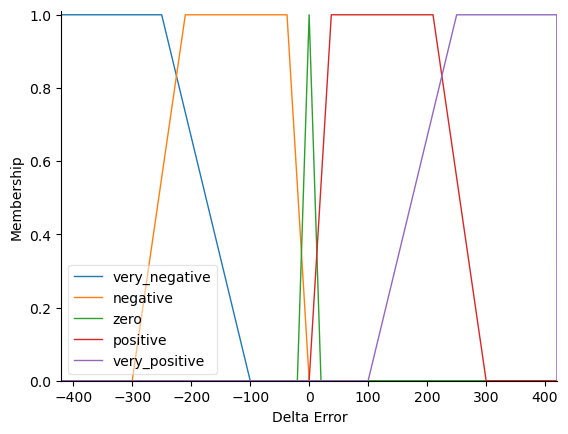

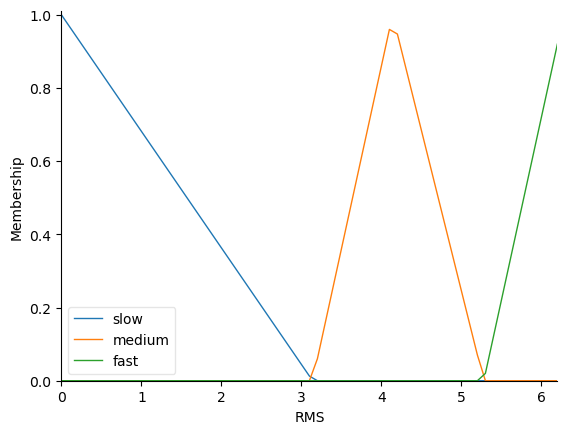

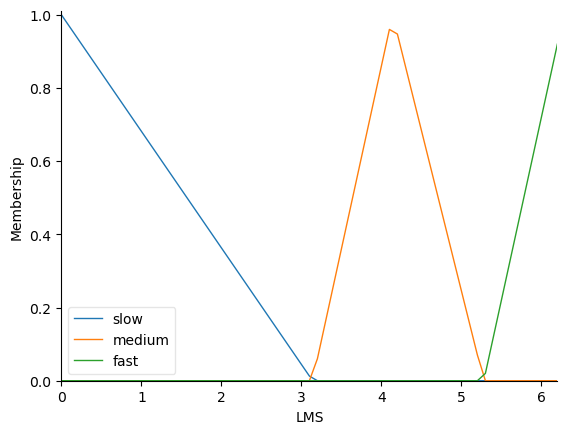

In [14]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctl

error = ctl.Antecedent(np.arange(-420, 421, 0.1), 'Error')
delta_error = ctl.Antecedent(np.arange(-420, 421, 0.1), 'Delta Error')

# Output
rms = ctl.Consequent(np.arange(0, 6.29, 0.1), 'RMS')
lms = ctl.Consequent(np.arange(0, 6.29, 0.1), 'LMS')

# Membership functions for error
error['very_negative'] = fuzz.trapmf(error.universe, [-420, -420, -250, -100])
error['negative'] = fuzz.trapmf(error.universe, [-300, -210, -37.5, 0])
error['zero'] = fuzz.trimf(error.universe, [-20, 0, 20])
error['positive'] = fuzz.trapmf(error.universe, [0, 37.5, 210, 300])
error['very_positive'] = fuzz.trapmf(error.universe, [100, 250, 420, 420])

# Membership functions for delta_error
delta_error['very_negative'] = fuzz.trapmf(error.universe, [-420, -420, -250, -100])
delta_error['negative'] = fuzz.trapmf(delta_error.universe, [-300, -210, -37.5, 0])
delta_error['zero'] = fuzz.trimf(delta_error.universe, [-20, 0, 20])
delta_error['positive'] = fuzz.trapmf(delta_error.universe, [0, 37.5, 210, 300])
delta_error['very_positive'] = fuzz.trapmf(error.universe, [100, 250, 420, 420])

# Membership functions for motor speed
rms['slow'] = fuzz.trimf(rms.universe, [0, 0, 3.14])
rms['medium'] = fuzz.trimf(rms.universe, [3.14, 4.14, 5.28])
rms['fast'] = fuzz.trimf(rms.universe, [5.28, 6.28, 6.28])

lms['slow'] = fuzz.trimf(lms.universe, [0, 0, 3.14])
lms['medium'] = fuzz.trimf(lms.universe, [3.14, 4.14, 5.28])
lms['fast'] = fuzz.trimf(lms.universe, [5.28, 6.28, 6.28])


error.view()
delta_error.view()
rms.view()
lms.view()

LMS Output: 5.89
RMS Output: 5.89


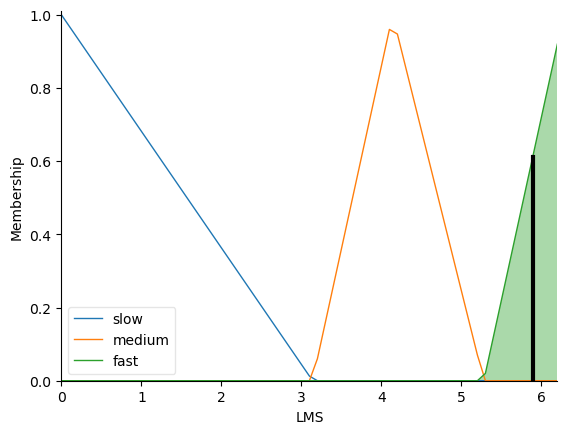

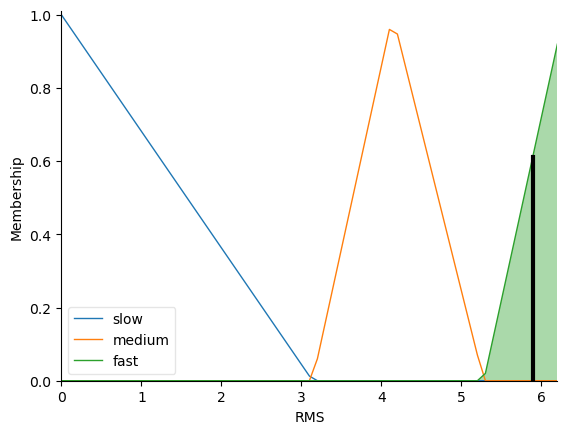

In [15]:
rules = [
    ctl.Rule(error['very_negative'] & delta_error['very_negative'], (rms['fast'], lms['slow'])),
    ctl.Rule(error['very_negative'] & delta_error['negative'], (rms['fast'], lms['slow'])),
    ctl.Rule(error['very_negative'] & delta_error['zero'], (rms['fast'], lms['medium'])),
    ctl.Rule(error['very_negative'] & delta_error['positive'], (rms['medium'], lms['fast'])),
    ctl.Rule(error['very_negative'] & delta_error['very_positive'], (rms['slow'], lms['fast'])),

    ctl.Rule(error['negative'] & delta_error['very_negative'], (rms['fast'], lms['slow'])),
    ctl.Rule(error['negative'] & delta_error['negative'], (rms['fast'], lms['slow'])),
    ctl.Rule(error['negative'] & delta_error['zero'], (rms['medium'], lms['slow'])),
    ctl.Rule(error['negative'] & delta_error['positive'], (rms['medium'], lms['medium'])),
    ctl.Rule(error['negative'] & delta_error['very_positive'], (rms['slow'], lms['fast'])),

    ctl.Rule(error['zero'] & delta_error['very_negative'], (rms['fast'], lms['medium'])),
    ctl.Rule(error['zero'] & delta_error['negative'], (rms['fast'], lms['medium'])),
    ctl.Rule(error['zero'] & delta_error['zero'], (rms['fast'], lms['fast'])),
    ctl.Rule(error['zero'] & delta_error['positive'], (rms['medium'], lms['fast'])),
    ctl.Rule(error['zero'] & delta_error['very_positive'], (rms['slow'], lms['medium'])),

    ctl.Rule(error['positive'] & delta_error['very_negative'], (rms['medium'], lms['fast'])),
    ctl.Rule(error['positive'] & delta_error['negative'], (rms['medium'], lms['fast'])),
    ctl.Rule(error['positive'] & delta_error['zero'], (rms['medium'], lms['medium'])),
    ctl.Rule(error['positive'] & delta_error['positive'], (rms['slow'], lms['medium'])),
    ctl.Rule(error['positive'] & delta_error['very_positive'], (rms['slow'], lms['fast'])),

    ctl.Rule(error['very_positive'] & delta_error['very_negative'], (rms['slow'], lms['fast'])),
    ctl.Rule(error['very_positive'] & delta_error['negative'], (rms['slow'], lms['fast'])),
    ctl.Rule(error['very_positive'] & delta_error['zero'], (rms['medium'], lms['fast'])),
    ctl.Rule(error['very_positive'] & delta_error['positive'], (rms['medium'], lms['medium'])),
    ctl.Rule(error['very_positive'] & delta_error['very_positive'], (rms['fast'], lms['slow']))
]

# Control system
rms_ctrl = ctl.ControlSystem(rules)
lms_ctrl = ctl.ControlSystem(rules)

# Simulation
rms_sim = ctl.ControlSystemSimulation(rms_ctrl)
lms_sim = ctl.ControlSystemSimulation(lms_ctrl)

# Input values
input_error = 0
input_delta_error = 0

lms_sim.input['Error'] = input_error
lms_sim.input['Delta Error'] = input_delta_error

rms_sim.input['Error'] = input_error
rms_sim.input['Delta Error'] = input_delta_error

# Compute the outputs
lms_sim.compute()
rms_sim.compute()

print(f"LMS Output: {lms_sim.output['LMS']:.2f}")
print(f"RMS Output: {lms_sim.output['RMS']:.2f}")

# Visualize the output membership functions
lms.view(sim=lms_sim)
rms.view(sim=rms_sim)